1. [15 marks; ~1.5 hrs ] Expectation Maximization: In this question, you will apply EM to cluster Iris data (See sklearn.load_iris). The Iris dataset is a well-known example, with three types of Irises which can be classified using 4-dimensional measurements (sepal length, sepal width, petal length, petal width). <br/>
<b>a. [10 marks; ~0.75hr ] 1-dimensional EM. <br/>
b. [5 marks; ~0.75hr ] multi-dimensional EM.</b>


<b>Sub Questions for 1</b><br/>
i. Can you choose a dimension that lets you cluster the data into two clear clusters? Which two flowers get grouped together in that case?<br/>
ii. Can you choose a dimension and initial values that let you cluster the data into three clusters?<br/> Which dimension did you use, and which two flowers are still a bit hard to differentiate this way? Is this consistent with the scatterplots?


<b>Answers</b> </br>
i.  
 - In comparison to the points positioning with respect to other features, the petal length and petal width has a more easily separable points as seen in scatter plot. Hence for <b>1-D dimension EM algorithm petal length</b> as a feature will be preferable.
 - If we consider 2 gaussians it can be seen that target names virginica(target = 2), versicolor(target = 1) will fall under one gaussian and setosa(target = 0) will have a separate gaussian.</br>
 
 
 ii.
 - Yes the suitable dimension will be <b>petal length</b> and initial mean for 3 gaussians will be at <b>1.5 , 4.2 and 5.7</b> according to petal length dimension.
 - Selected petal length dimension, virginica(target = 2) and versicolor(target = 1) are still hard to separate as they are very near and have some overlap around the petal length of 5cm.
 - Yes it is consistent with scatter plot



In [0]:
#imports
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [0]:
iris_data = load_iris()
features = iris_data.data[: , [0,1,2,3]]
print(iris_data.target_names)
print(features.shape)

['setosa' 'versicolor' 'virginica']
(150, 4)


In [0]:
#Finding the relationship between Sepal Length and Sepal width
#Reference: https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis
def createscatterplot(x,y,xlabel,ylabel):
  x_array = []
  y_array = []
  for ax in features:
      x_array.append(ax[x])
      y_array.append(ax[y])
  #Target_Labels setosa, versicolor, virginica
  color_codes = ('red', 'green','blue')
  #first 50 are from target 0 next 50 from target 1 and 100-150 from target 2
  split_data = ((x_array[:50], y_array[:50]), (x_array[50:100], y_array[50:100]), 
          (x_array[100:150], y_array[100:150]))
  
  for points, color in zip(split_data,color_codes): 
      x, y = points
      plt.scatter(x, y,color=color,alpha=1)
      plt.title('Iris Dataset scatter Plot')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

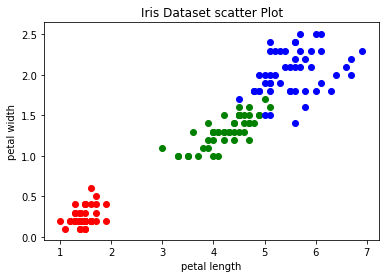

In [0]:
#createscatterplot(0,1,'sepal length','sepal width')
#createscatterplot(0,2,'petal length','petal length')
#createscatterplot(0,3,'petal length','petal width')
#createscatterplot(1,2,'sepal width','petal length')
#createscatterplot(1,3,'sepal width','petal width')
createscatterplot(2,3,'petal length','petal width')

In [0]:
#initialize 2 gaussians
g_mean = [1,6]
g_var  = [1,1.5]
#mixing proportion be equal initially
pi = [0.5,0.5]   
#responsiblities
probablity_x_given_gaussian =[]
#data
data_points= features[:,2]
#number of iterations
max_iter = 4
print('----Initialization----')
print('mixing ratio:'+str(pi))
print('mean        :'+str(g_mean))
print('std         :'+str(g_var))
#Iterations for updating mean,variance and mixing proportions
for iter in range(max_iter):
  print('\n----Iteration:'+str(iter)+'----')
  probablity_x_given_gaussian =[]
  #calculate probablity of x given a gaussian
  for i,(mean,var) in enumerate(zip(g_mean,g_var)):
    probablity_x_given_gaussian.append([])
    norm_factor = ((2*math.pi*var)**0.5) 
    point_mean_diff = np.array(data_points)-mean
    prob_fact = np.exp(-0.5*point_mean_diff.T*np.array(var**-1)*point_mean_diff)
    probablity_x_given_gaussian[i].append(prob_fact/norm_factor)  
  
  probablity_x_given_gaussian  = np.squeeze(np.array(probablity_x_given_gaussian)).T
 
  #calculate the probablity of gaussian given a datapoint :Responsiblities
  p_ggx_mix = probablity_x_given_gaussian*pi
  prob_gaussian_given_x=[]
  
  for x in range(p_ggx_mix.shape[1]):
    prob_gaussian_given_x.append(p_ggx_mix[:,x]/np.sum(p_ggx_mix,axis=1))
  prob_gaussian_given_x = np.array(prob_gaussian_given_x).T

  #sum all points responsiblity for a particular gaussian
  point_sum = np.sum(prob_gaussian_given_x,axis=0)
  #create temp variables to update for this iteration
  temp_pi = pi
  temp_var = g_var
  temp_mean = g_mean
  print(prob_gaussian_given_x)
  for i,pt_sm in enumerate(point_sum):
    #Mixing proportion are updated by sum of all probablity 
    temp_pi[i] = pt_sm/sum(point_sum)
    temp_mean[i] = (np.dot(prob_gaussian_given_x[:,i].reshape(1,-1),data_points.reshape(len(data_points),1))[0][0]/point_sum[i])
    temp_var[i] = ((np.dot( prob_gaussian_given_x[:,i].reshape(1,-1) ,(data_points.reshape(len(data_points),1) - g_mean[i])**2 )[0][0] / point_sum[i]))
    
  #assign to final variable
  pi = temp_pi
  g_mean = temp_mean
  g_var = temp_var
  print('mixing ratio:'+str(pi))
  print('mean        :'+str(g_mean))
  print('variance    :'+str(g_var))

----Initialization----
mixing ratio:[0.5, 0.5]
mean        :[1, 6]
std         :[1, 1.5]

----Iteration:0----
[[9.99235914e-01 7.64085957e-04]
 [9.99235914e-01 7.64085957e-04]
 [9.99458738e-01 5.41261898e-04]
 [9.98917861e-01 1.08213939e-03]
 [9.99235914e-01 7.64085957e-04]
 [9.97808698e-01 2.19130156e-03]
 [9.99235914e-01 7.64085957e-04]
 [9.98917861e-01 1.08213939e-03]
 [9.99235914e-01 7.64085957e-04]
 [9.98917861e-01 1.08213939e-03]
 [9.98917861e-01 1.08213939e-03]
 [9.98462511e-01 1.53748924e-03]
 [9.99235914e-01 7.64085957e-04]
 [9.99725714e-01 2.74285723e-04]
 [9.99615327e-01 3.84672859e-04]
 [9.98917861e-01 1.08213939e-03]
 [9.99458738e-01 5.41261898e-04]
 [9.99235914e-01 7.64085957e-04]
 [9.97808698e-01 2.19130156e-03]
 [9.98917861e-01 1.08213939e-03]
 [9.97808698e-01 2.19130156e-03]
 [9.98917861e-01 1.08213939e-03]
 [9.99803778e-01 1.96222345e-04]
 [9.97808698e-01 2.19130156e-03]
 [9.95508495e-01 4.49150471e-03]
 [9.98462511e-01 1.53748924e-03]
 [9.98462511e-01 1.53748924e-03]

<b> For 2 gaussians considering 1d(Petal Length)<br/>
mixing ratio:[0.3331175741794251, 0.6668824258205749]<br/>
mean        :[1.4617573194325795, 4.905006971336325]<br/>
variance    :[0.029468729435989358, 0.67760033105676]</b>

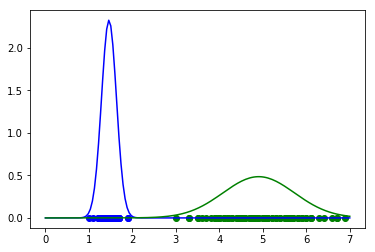

In [0]:
#plot the final guassians after above iterations
npl = np.linspace(start = 0, stop = 7, num = 150)
for i,x in enumerate(prob_gaussian_given_x):
  if x[0] > x[1]:
    plt.plot(data_points[i],np.zeros((1,)),'bo--')
  else:
    plt.plot(data_points[i],np.zeros((1,)),'go--')
gauss_color_code = ['b','g']    
for mn, vr,c in zip(g_mean, g_var,gauss_color_code):
    y = norm(mn, vr**0.5).pdf(npl)
    plt.plot(npl, y,c)

In [0]:
#Reference: scikit-learn gmm model
def setMixMeanVar(prob_gaussian_given_x,data_points,n_samples):
  #Estimate mixing proportions
  pi = prob_gaussian_given_x.sum(axis=0) 
  #Estimate means a 3*4 matrix
  g_mean = np.dot(prob_gaussian_given_x.T, data_points) / pi[:, np.newaxis]
  #Estimate covariance matrix - to calculate co-variance matrix we need to find dot-product of responsiblities with (datapoints - mean)**2 divided by the mixing proportions
  #For calculation we can simplify the calculation by (responsiblities * (datapoints**2 -2**datapoints*mean + mean**2)/mixprop)
  #which can be further simplified as for mean it would be a constant matrix so responsiblity by mixproportion would be 1
  g_var = ((np.dot(prob_gaussian_given_x.T, data_points * data_points) -2 *g_mean*np.dot(prob_gaussian_given_x.T, data_points))/ pi[:, np.newaxis]) + g_mean**2
  pi_prob = pi/n_samples
  return pi_prob,g_mean,g_var
prob_plot = []
num_gaussian = 3
#data
data_points= features
#number of samples
n_samples = features.shape[0]
#initialize 3 gaussians
#randomly create responsiblities  
np.random.seed = 10
random_state = np.random.RandomState(np.random.seed)
prob_gaussian_given_x = random_state.rand(n_samples, num_gaussian)
#normalize responsiblities
prob_gaussian_given_x /= prob_gaussian_given_x.sum(axis=1)[:, np.newaxis]
pi_prob,g_mean,g_var = setMixMeanVar(prob_gaussian_given_x,data_points,n_samples)
print('----Initialization----')
print('mixing ratio:\n'+str(pi_prob))
print('mean        :\n'+str(g_mean))
print('std         :\n'+str(g_var)) 
#number of iterations
max_iter = 11
log_likelihood =[]                         
#Iterations for updating mean,variance and mixing proportions
for iter in range(max_iter):
  # Here we need to update the responsiblities
  # itererate over mean var and mixprportion till the length of responsiblities
  # probabality of x
  probablity_x = np.sum([pi_cur*multivariate_normal(mean=mean_cur,cov=var_cur).pdf(data_points) for pi_cur,mean_cur,var_cur in zip(pi_prob,g_mean,g_var)],axis=0)
  for mn,vr,p,res in zip(g_mean,g_var,pi_prob,range(len(prob_gaussian_given_x[0]))):
      m_norm = multivariate_normal(mean=mn,cov=vr)
      # For calculating the responsiblities here we calculate the the probablities of x given the gaussian and multiply it with the mixing proportion
      # Then we need to divide it by the sum probablities of x for all the gaussian multiplied with there respective mixing proportions
      prob_gaussian_given_x[:,res] = p*m_norm.pdf(data_points)/probablity_x
  pi_prob,g_mean,g_var = setMixMeanVar(prob_gaussian_given_x,data_points,n_samples)
  print('\n----Iteration:'+str(iter)+'----')
  print('mixing ratio:\n'+str(pi_prob))
  print('mean        :\n'+str(g_mean))
  print('covariance        :\n'+str(g_var))


----Initialization----
mixing ratio:
[0.3172253  0.31719287 0.36558183]
mean        :
[[5.87164958 3.05940578 3.84007457 1.24393245]
 [5.75194715 3.06101934 3.52728872 1.10282187]
 [5.89805272 3.05233689 3.88695565 1.24437053]]
std         :
[[0.65129201 0.18562219 3.01829001 0.57463676]
 [0.68594249 0.19293722 3.25416987 0.613921  ]
 [0.69188847 0.18768911 2.95617924 0.53554415]]

----Iteration:0----
mixing ratio:
[0.31270008 0.32381488 0.36348504]
mean        :
[[5.93879213 3.03336322 3.9949624  1.30235077]
 [5.57905591 3.12737283 3.12362797 0.93309282]
 [5.99664635 3.01555892 4.11928293 1.34789262]]
covariance        :
[[0.65511193 0.17616042 2.86770237 0.54683435]
 [0.61322345 0.21229183 3.10105341 0.56665085]
 [0.67042268 0.17189645 2.74919166 0.51818872]]

----Iteration:1----
mixing ratio:
[0.28433038 0.35759126 0.35807835]
mean        :
[[6.10929188 2.95785465 4.45569291 1.49312403]
 [5.24831339 3.254842   2.25992539 0.57141905]
 [6.22636079 2.9390839  4.70003713 1.5931104 ]]
co

<b>
For 4 dimensions<br/>
<br/>mixing ratio:<br/></b>
[0.30386043 0.33333333 0.36280623]<br/>
<b>mean        :<br/></b>
[[5.83122099 2.69846707 4.2207843  1.30392051]<br/>
 [5.006      3.428      1.462      0.246     ]<br/>
 [6.62278955 3.01733872 5.47988744 1.98762704]]<br/>
<b>covariance        :<br/></b>
[[0.22680933 0.08661282 0.22554653 0.03495556]<br/>
 [0.121764   0.140816   0.029556   0.010884  ]<br/>
 [0.32369504 0.08253741 0.32841279 0.08588892]]<br/>


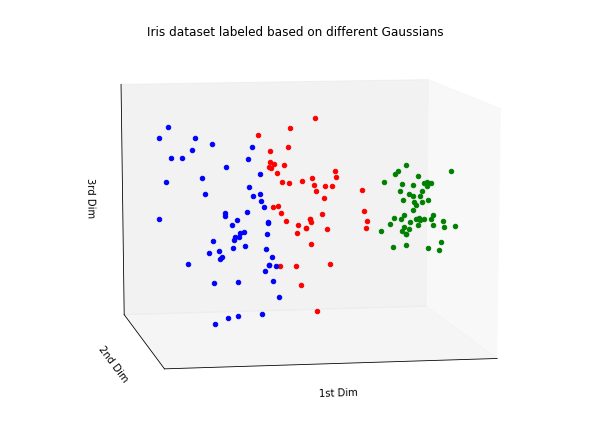

In [0]:
#PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-170, azim=100)

data_transformed = PCA(n_components=3).fit_transform(features)
for i,x  in enumerate(prob_gaussian_given_x):
  if x[0] > x[1] and x[0] > x[2] :
    ax.scatter(data_transformed[i, 0], data_transformed[i, 1], data_transformed[i, 2],c='r')
  elif x[1] > x[0] and x[1] > x[2]  :
    ax.scatter(data_transformed[i, 0], data_transformed[i, 1], data_transformed[i, 2],c='g')
  else:
    ax.scatter(data_transformed[i, 0], data_transformed[i, 1], data_transformed[i, 2],c='b')
    

ax.set_title("Iris dataset labeled based on different Gaussians")
ax.set_xlabel("1st Dim")
ax.set_ylabel("2nd Dim")
ax.set_zlabel("3rd Dim")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()

In [0]:
#validate with sklearns em algorithm
np.random.seed = 10
num_classes = len(iris_data.target_names)
assignments = np.random.rand(features.shape[0], num_classes)
assignments = assignments / np.sum(assignments, axis=1, keepdims=True)
gmm = GaussianMixture(n_components = num_classes,random_state=10, init_params ="random",covariance_type="diag",reg_covar=0,verbose=2,verbose_interval=5)
gmm.fit(features)
print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)

Initialization 0
  Iteration 5	 time lapse 0.00622s	 ll change 0.50218
  Iteration 10	 time lapse 0.00717s	 ll change 0.00230
Initialization converged: True	 time lapse 0.01464s	 ll -2.04580
[0.30386043 0.33333333 0.36280623]
[[5.83122099 2.69846707 4.2207843  1.30392051]
 [5.006      3.428      1.462      0.246     ]
 [6.62278955 3.01733872 5.47988744 1.98762704]]
[[0.22680933 0.08661282 0.22554653 0.03495556]
 [0.121764   0.140816   0.029556   0.010884  ]
 [0.32369504 0.08253741 0.32841279 0.08588892]]


2. [10 marks; ~0.5 hrs] K-means is derived from EM. However, instead of calculating both means and variances, it calculates only the means. What is(are) the assumption(s) that K-Means makes? Using a suitable synthetic dataset, demonstrate how K-Means fails when any one of the assumptions are violated. Use appropriate visualizations to explain better. (You can use the K-means function available in the skLearn library).
Hint: examples of such datasets have been discussed in class on several occasions.


<b>K-Means Assumptions:<br/>
- Random initialization of cluster might give different clusters and k-means might end up at local optima.
- It considers all the points while updating the clusters, even outliers.<br/>
- It assumes that the data points are in R^n dimensions and drops x0 =1<br/>
- It assumes the Number of Classes the given dataset has that is it defines the number of clusters.<br/>
- It assumes that the points in the clusters are similar/points will be closer to the cluster they should belong /Kmeans assumes spherical shapes of clusters.
</b>

Text(0.5, 1.0, 'Unequal Variance')

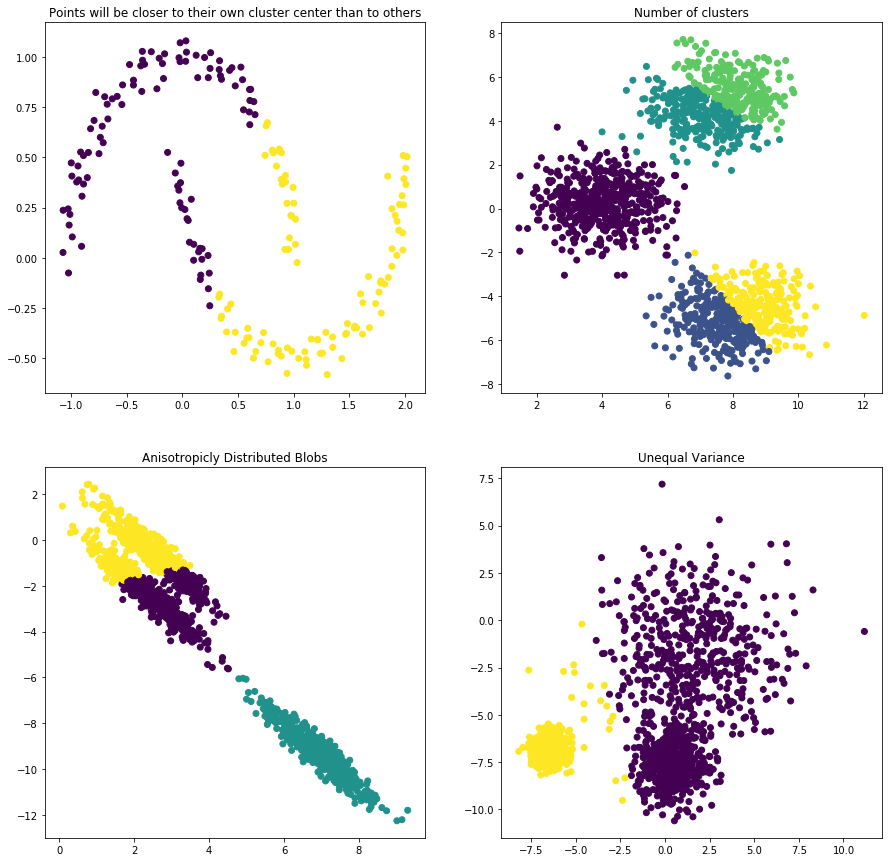

In [0]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
plt.figure(figsize=(15, 15))
n_samples = 1500
random_state = 150


from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(200, noise=.05, random_state=0)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_moon)
plt.subplot(221)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred)
plt.title("Points will be closer to their own cluster center than to others")

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(X)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Number of clusters")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(223)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=181)
y_pred = KMeans(n_clusters=2, random_state=116).fit_predict(X_varied)

plt.subplot(224)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

